In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\briyani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets


In [9]:
print(X.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        4  
1    yes      yes        no       5         3     3    1    1      3        2  
2    yes      yes        no       4         3     2    2    3      3        6  
3    yes      yes       yes       3         2     2    1    1      5        0  
4    yes       no        no       4         3     2    1    2      5        0  

[5 rows x 30 columns]


In [10]:
print(y.head())

   G1  G2  G3
0   0  11  11
1   9  11  11
2  12  13  12
3  14  14  14
4  11  13  13


In [12]:
print(X.info)

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... higher int

In [13]:
print(X.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64


In [14]:
df=pd.concat([X,y],axis=1)

In [16]:
print(df.head(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


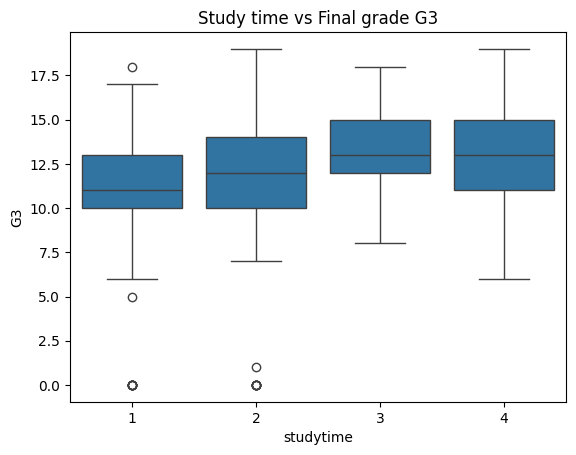

In [17]:
sns.boxplot(x="studytime",y="G3",data=df)
plt.title("Study time vs Final grade G3")
plt.show()

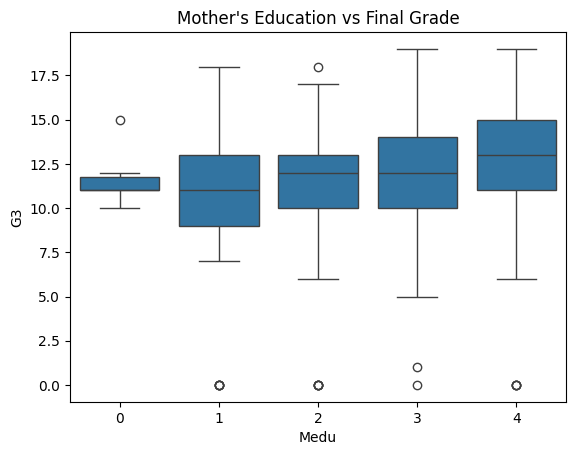

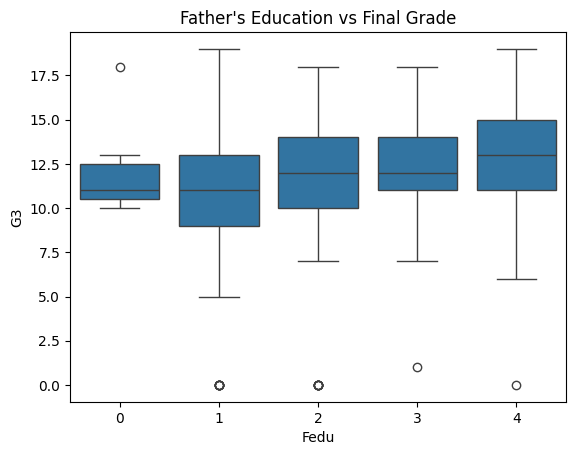

In [18]:
sns.boxplot(x='Medu', y='G3', data=df)
plt.title("Mother's Education vs Final Grade")
plt.show()

sns.boxplot(x='Fedu', y='G3', data=df)
plt.title("Father's Education vs Final Grade")
plt.show()

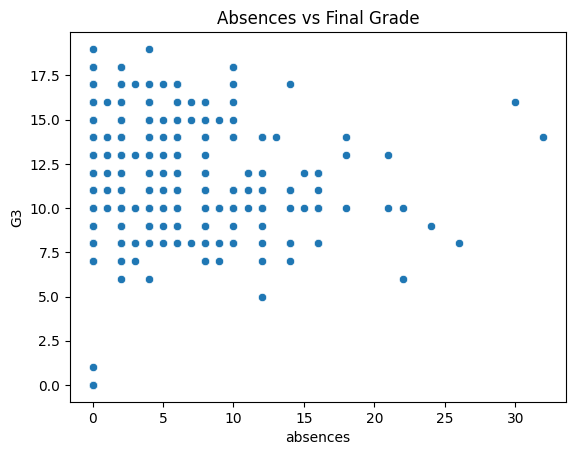

In [19]:
sns.scatterplot(x='absences', y='G3', data=df)
plt.title("Absences vs Final Grade")
plt.show()

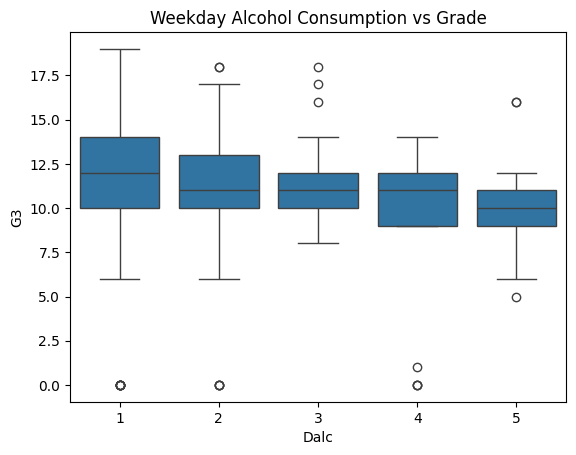

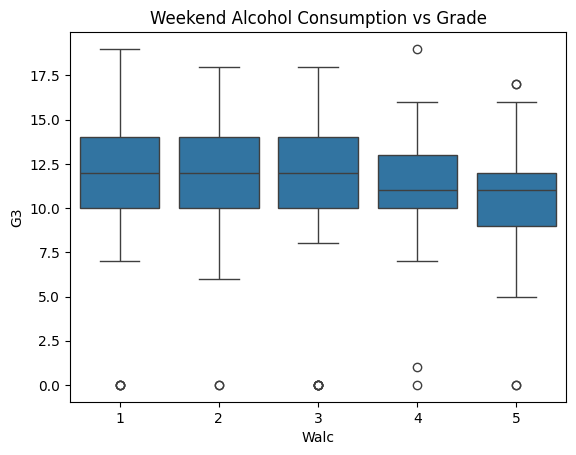

In [20]:
sns.boxplot(x='Dalc', y='G3', data=df)
plt.title("Weekday Alcohol Consumption vs Grade")
plt.show()

sns.boxplot(x='Walc', y='G3', data=df)
plt.title("Weekend Alcohol Consumption vs Grade")
plt.show()

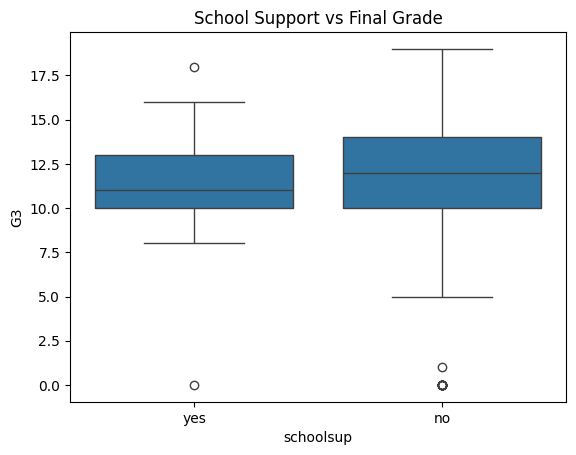

In [21]:
sns.boxplot(x='schoolsup', y='G3', data=df)
plt.title("School Support vs Final Grade")
plt.show()

In [22]:
#simple binary conversion
df_numeric = df.copy()
df_numeric = df_numeric.replace({'yes': 1, 'no': 0, 'F': 0, 'M': 1}) 

C:\Users\briyani\AppData\Local\Temp\ipykernel_23940\1818426320.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric = df_numeric.replace({'yes': 1, 'no': 0, 'F': 0, 'M': 1})


In [23]:
# drop non-numeric columns (optional)
df_numeric = df_numeric.select_dtypes(include='number')

# correlation
corr = df_numeric.corr()

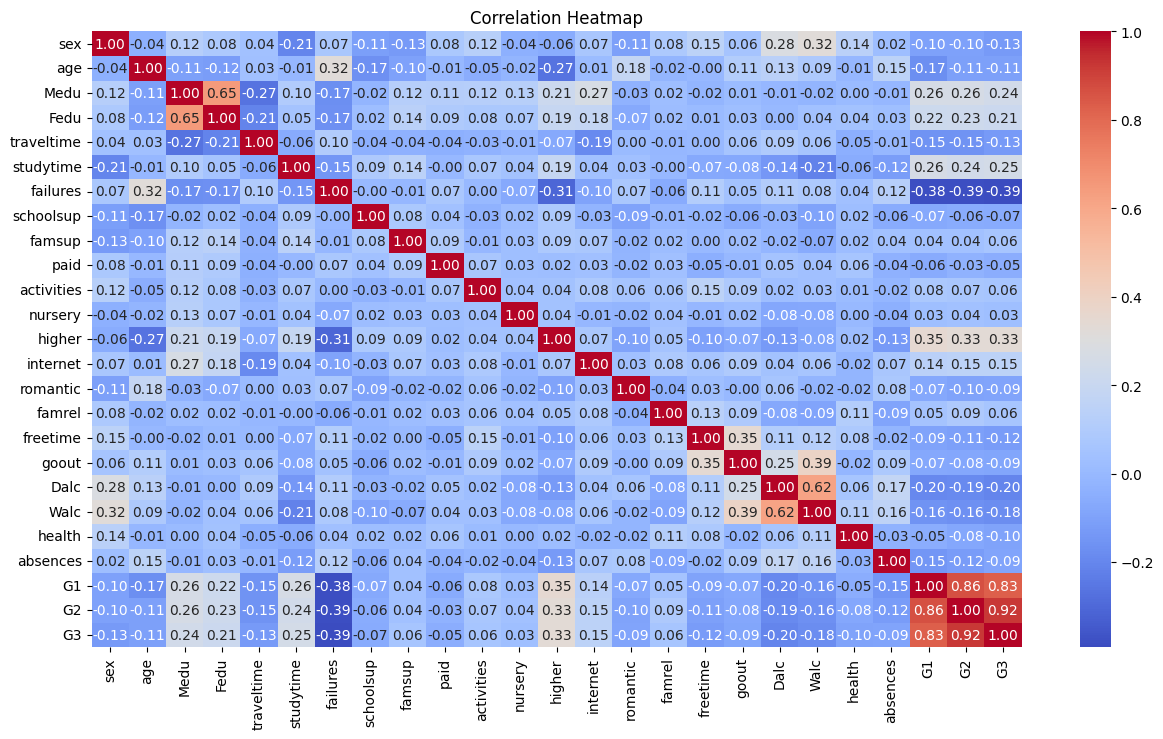

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True,cmap="coolwarm", fmt=".2f") 
plt.title("Correlation Heatmap")
plt.show()